In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/raw/titanic_dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
print("Percentage of missing ages:", df["Age"].isnull().sum()*100/len(df),"%")
print("Percentage of missing cabins:", df["Cabin"].isnull().sum()*100/len(df),"%")

Percentage of missing ages: 19.865319865319865 %
Percentage of missing cabins: 77.10437710437711 %


In [5]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)

df["Embarked"] = df["Embarked"].fillna( df["Embarked"].mode()[0])

In [6]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
print(df["Sex"].unique())
print(df["Embarked"].unique()) # Southampton, Cherbourg, Queenstown
print(df["Pclass"].unique()) # First class, Second class, Third class
print(df["Parch"].unique()) # Parents / Children Aboard

['male' 'female']
['S' 'C' 'Q']
[3 1 2]
[0 1 2 5 3 4 6]


# Age outliers Detection

<function matplotlib.pyplot.show(close=None, block=None)>

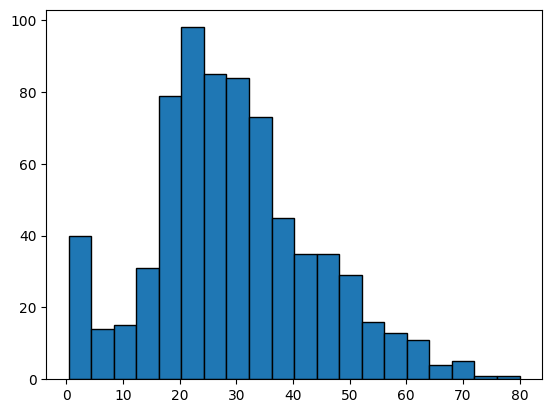

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df["Age"], bins=20, edgecolor="black")
plt.show

In [9]:
df["Age"] = df.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

In [10]:
df["Age"].describe()

count    891.000000
mean      29.318643
std       13.281103
min        0.420000
25%       21.750000
50%       26.507589
75%       36.000000
max       80.000000
Name: Age, dtype: float64

# Fare outliers Detection

<function matplotlib.pyplot.show(close=None, block=None)>

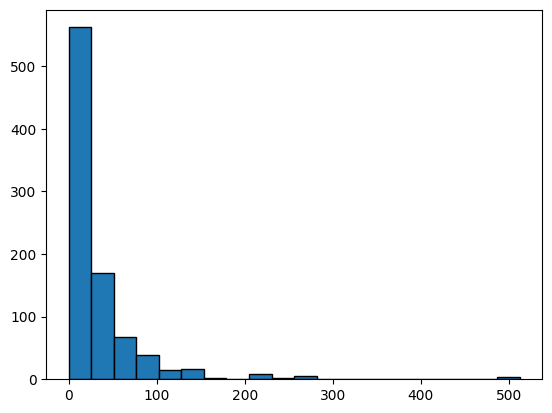

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df["Fare"], bins=20, edgecolor="black")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

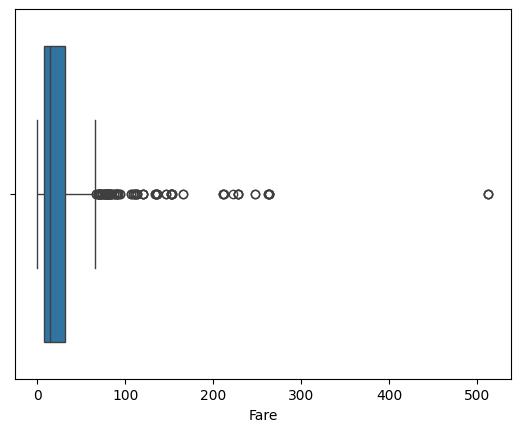

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df["Fare"])
plt.show

In [13]:
Q1 = df["Fare"].quantile(0.25)
Q3 = df["Fare"].quantile(0.75)
IQR = Q3-Q1

upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

outliers = (df["Fare"] < lower_limit) | (df["Fare"] > upper_limit)
print("Number of Outliers:",outliers.sum())
print("Percentage of outliers:", (outliers.sum()*100) / len(df), "%")


Number of Outliers: 116
Percentage of outliers: 13.019079685746352 %


In [14]:
df["Fare"] = df["Fare"].clip(upper = upper_limit)

<function matplotlib.pyplot.show(close=None, block=None)>

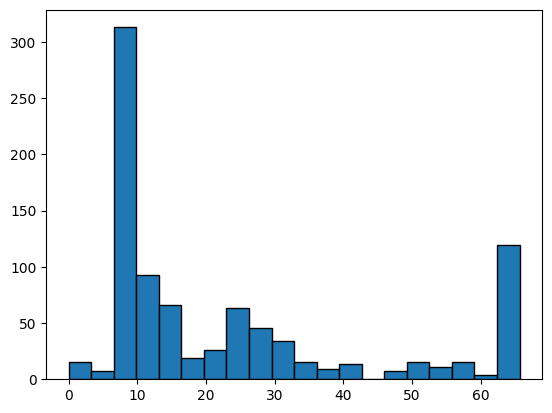

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df["Fare"], bins=20, edgecolor="black")
plt.show

In [16]:
df["FamilySize"] = df['SibSp'] + df["Parch"] + 1

In [17]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,0,3,male,22.0,1,0,7.2500,S,2
1,1,1,female,38.0,1,0,65.6344,C,2
2,1,3,female,26.0,0,0,7.9250,S,1
3,1,1,female,35.0,1,0,53.1000,S,2
4,0,3,male,35.0,0,0,8.0500,S,1


# Encoding Categorical Features (Sex / Embarked)

In [18]:
X = df.drop(["Survived"], axis=1)
y = df["Survived"]

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
692,3,male,26.507589,0,0,56.4958,S,1
481,2,male,30.740707,0,0,0.0000,S,1
527,1,male,41.281386,0,0,65.6344,S,1
855,3,female,18.000000,0,1,9.3500,S,2
801,2,female,31.000000,1,1,26.2500,S,3


In [21]:

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False, drop='first')
encoder.set_output(transform="pandas") # converting NumPy Array into df

categorical_cols = ["Sex", "Embarked"]


X_train_cat = encoder.fit_transform(X_train[categorical_cols])
X_test_cat = encoder.transform(X_test[categorical_cols])

X_train_encoded = pd.concat([X_train.drop(columns=categorical_cols), X_train_cat], axis=1)
X_test_encoded = pd.concat([X_test.drop(columns=categorical_cols), X_test_cat], axis=1)

In [22]:
X_train_encoded.head()

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_male,Embarked_Q,Embarked_S
692,3,26.507589,0,0,56.4958,1,1.0,0.0,1.0
481,2,30.740707,0,0,0.0000,1,1.0,0.0,1.0
527,1,41.281386,0,0,65.6344,1,1.0,0.0,1.0
855,3,18.000000,0,1,9.3500,2,0.0,0.0,1.0
801,2,31.000000,1,1,26.2500,3,0.0,0.0,1.0


# Feature Importance

In [23]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X_train_encoded, y_train, random_state=42)

mi_series = pd.Series(mi, index=X_train_encoded.columns)

mi_series = mi_series.sort_values(ascending=False)
print("Top Features:")
print(mi_series)

Top Features:
Sex_male      0.160805
Fare          0.146134
Age           0.080425
Pclass        0.069514
FamilySize    0.040179
Embarked_S    0.033091
SibSp         0.032331
Parch         0.026344
Embarked_Q    0.010531
dtype: float64


In [24]:
important_features = ["Sex_male", "Fare",'Age', 'Pclass']

X_train_final = X_train_encoded[important_features]
X_test_final = X_test_encoded[important_features]

In [25]:
X_train_final.head()

,Sex_male,Fare,Age,Pclass
692,1.0,56.4958,26.507589,3
481,1.0,0.0000,30.740707,2
527,1.0,65.6344,41.281386,1
855,0.0,9.3500,18.000000,3
801,0.0,26.2500,31.000000,2


# Model Creation

In [26]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

## Decision Tree

In [27]:
model1 = DecisionTreeClassifier(max_depth=4)
model1.fit(X_train_final, y_train)

y_pred_test = model1.predict(X_test_final)
y_pred_train = model1.predict(X_train_final)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy Train:", accuracy_score(y_train, y_pred_train))
print("Accuracy Test:", accuracy_score(y_test, y_pred_test), "\n")

print(classification_report(y_test, y_pred_test))

Accuracy Train: 0.8398876404494382
Accuracy Test: 0.8044692737430168 

              precision    recall  f1-score   support

           0       0.80      0.92      0.85       110
           1       0.83      0.62      0.71        69

    accuracy                           0.80       179
   macro avg       0.81      0.77      0.78       179
weighted avg       0.81      0.80      0.80       179



## Random Forest

In [28]:
model2 = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42, class_weight='balanced')
                                    
model2.fit(X_train_final, y_train)

y_pred_test = model2.predict(X_test_final)
y_pred_train = model2.predict(X_train_final)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy Train:", accuracy_score(y_train, y_pred_train))
print("Accuracy Test:", accuracy_score(y_test, y_pred_test), "\n")


print(classification_report(y_test, y_pred_test))

Accuracy Train: 0.8721910112359551
Accuracy Test: 0.8324022346368715 

              precision    recall  f1-score   support

           0       0.84      0.89      0.87       110
           1       0.81      0.74      0.77        69

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



## Gradient Boosting

In [29]:
model3 = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=6)

model3.fit(X_train_final, y_train)

y_pred_test = model3.predict(X_test_final)
y_pred_train = model3.predict(X_train_final)

from sklearn.metrics import accuracy_score, classification_report
print("Accuracy Train:", accuracy_score(y_train, y_pred_train))
print("Accuracy Test:", accuracy_score(y_test, y_pred_test), "\n")

print(classification_report(y_test, y_pred_test))

Accuracy Train: 0.8974719101123596
Accuracy Test: 0.8156424581005587 

              precision    recall  f1-score   support

           0       0.80      0.93      0.86       110
           1       0.85      0.64      0.73        69

    accuracy                           0.82       179
   macro avg       0.82      0.78      0.79       179
weighted avg       0.82      0.82      0.81       179

